config
Runtime ->Change runtime type ->select GPU

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip data

In [ ]:
from zipfile import ZipFile
file_path = "/content/drive/My Drive/Colab Notebooks/Thesis/image_data.zip"
with ZipFile(file_path,'r') as zip:
    zip.extractall()
    print("Done") 

Done


#Count data 

In [ ]:
import os
total_training_samples = 0
for expression in os.listdir("/content/image_data/train"):    
    num = len(os.listdir("/content/image_data/train/"+expression))
    total_training_samples += num
    print(expression +" "+str(num)+" "+"images ")

print("Total training samples : ",total_training_samples)

anger 1440 images 
sadness 1440 images 
happiness 1440 images 
fear 1440 images 
surprise 1440 images 
neutral 1440 images 
disgust 1440 images 
Total training samples :  10080


In [ ]:
total_validation_samples = 0
for expression in os.listdir("/content/image_data/validation"):
    num = len(os.listdir("/content/image_data/validation/"+expression))
    total_validation_samples += num
    print(expression +" "+str(num)+" "+"images ")

print("Total validation samples : ",total_validation_samples)

anger 360 images 
sadness 360 images 
happiness 360 images 
fear 360 images 
surprise 360 images 
neutral 360 images 
disgust 360 images 
Total validation samples :  2520


#Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = 48
batch_size = 32

datagen_train = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.1, 
                                   rotation_range=10, 
                                   shear_range = 0.1, 
                                   horizontal_flip=True, 
                                   fill_mode="nearest")

train_generator = datagen_train.flow_from_directory("/content/image_data/train/",
                                                    target_size=(image_size,image_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_generator = datagen_validation.flow_from_directory("/content/image_data/validation/",
                                                    target_size=(image_size,image_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 10080 images belonging to 7 classes.
Found 2520 images belonging to 7 classes.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.3.0


#Hyperparameter Tuning

In [ ]:
epochs = 150
lr = 0.001
loss = "categorical_crossentropy"
optimizer = Adam(learning_rate = lr )

In [ ]:
model = Sequential()

model.add(Conv2D(32 ,(3,3),activation='relu',input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7,activation='softmax'))

model.compile(optimizer =optimizer,loss = loss,metrics = ['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model_1.png',width=400, height=200)


In [ ]:
print(train_generator.n)
print(validation_generator.n)
print(train_generator.batch_size)
steps_per_epoch = train_generator.n //train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

#early_stopping = EarlyStopping(patience=5)

history = model.fit( train_generator,
                    steps_per_epoch = total_training_samples//batch_size,
                    validation_data = validation_generator,
                    validation_steps = total_validation_samples//batch_size,
                    epochs = epochs)
#callbacks=[early_stopping] 

10080
2520
32
Epoch 1/150
315/315 [==============================] - 7s 22ms/step - loss: 1.8385 - accuracy: 0.1989 - val_loss: 1.6565 - val_accuracy: 0.3133
Epoch 2/150
315/315 [==============================] - 7s 22ms/step - loss: 1.7074 - accuracy: 0.2887 - val_loss: 1.4370 - val_accuracy: 0.3850
Epoch 3/150
315/315 [==============================] - 7s 22ms/step - loss: 1.6096 - accuracy: 0.3414 - val_loss: 1.3473 - val_accuracy: 0.4427
Epoch 4/150
315/315 [==============================] - 7s 22ms/step - loss: 1.5475 - accuracy: 0.3845 - val_loss: 1.3288 - val_accuracy: 0.4467
Epoch 5/150
315/315 [==============================] - 7s 22ms/step - loss: 1.4852 - accuracy: 0.4096 - val_loss: 1.3052 - val_accuracy: 0.4808
Epoch 6/150
315/315 [==============================] - 7s 22ms/step - loss: 1.4463 - accuracy: 0.4266 - val_loss: 1.2631 - val_accuracy: 0.4856
Epoch 7/150
315/315 [==============================] - 7s 22ms/step - loss: 1.3851 - accuracy: 0.4523 - val_loss: 1.1925 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


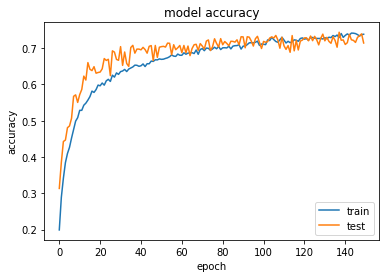

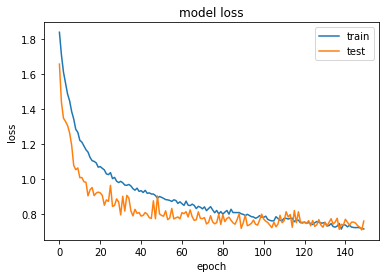

In [ ]:
print(history.history.keys())
#history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('acc_1.png', dpi=300, bbox_inches='tight')
plt.show()

#history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('loss_1.png', dpi=300, bbox_inches='tight')
plt.show()


# Visualize training,validation history

#Save model weights [ h5 ]

In [ ]:
model.save_weights("model_1.h5")
print("save model to disk")

save model to disk


#Save model architecture [ JSON ]

In [ ]:
model_json = model.to_json()
with open("model_1.json","w") as json_file:
     json_file.write(model_json)